In [1]:
from __future__ import print_function

"""
A reference implementation of cavity quantum electrodynamics 
configuration interactions singles.
"""

__authors__   = ["Jon McTague", "Jonathan Foley"]
__credits__   = ["Jon McTague", "Jonathan Foley"]

__copyright_amp__ = "(c) 2014-2018, The Psi4NumPy Developers"
__license__   = "BSD-3-Clause"
__date__      = "2021-01-15"

# ==> Import Psi4, NumPy, & SciPy <==
import psi4
import numpy as np
from helper_cqed_rhf import *
from helper_cis import *
from helper_cs_cqed_cis import *
from psi4.driver.procrouting.response.scf_response import tdscf_excitations
import fortecubeview
# Set Psi4 & NumPy Memory Options
psi4.set_memory('2 GB')
#psi4.core.set_output_file('output.dat', False)

numpy_memory = 2


In [2]:

mol_str = """

0 1
O 0.0000000000 0.0000000000 0.6881243879
C 0.0000000000 0.0000000000 -0.5150066070
H 0.0000000000 0.9462463671 -1.1029423155
H 0.0000000000 -0.9462463671 -1.1029423155
no_reorient
symmetry c1
"""
# options dict
options_dict = {'basis': 'cc-pVDZ',
               'save_jk': True, 
               'scf_type': 'pk'}

# set psi4 options and geometry
psi4.set_options(options_dict)
mol = psi4.geometry(mol_str)
psi4.optimize('scf/cc-pvdz', molecule=mol)

a = np.asarray(mol.geometry())
print(a * 0.529)

Optimizer: Optimization complete!
[[ 0.00000000e+00  1.87493970e-12  5.91268220e-01]
 [ 0.00000000e+00 -2.31560634e-12 -5.90400099e-01]
 [ 0.00000000e+00  9.32184336e-01 -1.17703144e+00]
 [ 0.00000000e+00 -9.32184336e-01 -1.17703144e+00]]


In [7]:
mol_str = """

0 1
O 0.0000000000 0.0000000000 5.91268220e-01
C 0.0000000000 0.0000000000 -5.90400099e-01
H 0.0000000000 9.32184336e-01 -1.17703144e+00
H 0.0000000000 -9.32184336e-01 -1.17703144e+00
no_reorient
symmetry c1
"""

# set psi4 options and geometry
psi4.set_options(options_dict)
mol = psi4.geometry(mol_str)
# photon energy
om = 0 #4.34405539 / 27.211

# electric field strength 
#E_au = 0.00

# strength for the dipole self energy
#l = E_au / np.sqrt(om/2)
l = 0 #.01
lam = np.array([0,0,l])

# run psi4 SCF
psi4_rhf_e, wfn = psi4.energy("scf/cc-pVDZ", return_wfn=True, molecule=mol)
# confirm our cis agrees with psi4
res = tdscf_excitations(wfn, states=6, triplets = "NONE", tda=True)
    
# parse res for excitation energies
psi4_excitation_e = [r["EXCITATION ENERGY"] for r in res]
    
# run helper_cs_cqed_cis()
cqed_dict = cs_cqed_cis(lam, mol_str, options_dict, om, complex_coupling=True)

cqed_cis_e = cqed_dict['cqed_cis excitation energies']
scf_e = cqed_dict['rhf_energy']

print(res)

Frequency   is  0
Om Coupling is  0
-113.87722217627613

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835951352545862
CQED-RHF One-electron energy = -218.2835951352545862
Nuclear repulsion energy = 31.7803657982661569
Dipole energy = 0.0000000000000000
SCF Iteration   1: Energy = -113.8772221766078871   dE = -1.13877E+02   dRMS = 8.64881E-08
SCF Iteration   2: Energy = -113.8772221766161010   dE = -8.21387E-12   dRMS = 3.57082E-08
Performed QED-RHF on the following molecule


0 1
O 0.0000000000 0.0000000000 5.91268220e-01
C 0.0000000000 0.0000000000 -5.90400099e-01
H 0.0000000000 9.32184336e-01 -1.17703144e+00
H 0.0000000000 -9.32184336e-01 -1.17703144e+00
no_reorient
symmetry c1

Total time for SCF iterations: 0.066 seconds 

QED-RHF   energy: -113.87722218 hartree
Psi4  SCF energy: -113.87722218 hartree
[{'EXCITATION ENERGY': 0.1737074785545762, 'ELECTRIC DIPOLE TRANSITION MOMENT (LEN)': array([ 2.28750091e-16, -6.18176296e-17,  1.21214145e-15]), 'OSCILLATOR STREN

In [10]:
print(psi4_excitation_e)

[0.1737074785545762, 0.37801837347927925, 0.3803811351931643, 0.3879517708881098, 0.4376049968780329, 0.4731659136376842]


In [6]:
print(cqed_cis_e)

[ 0.          0.          0.17370801  0.17370801  0.37801968  0.37801968
  0.38038117  0.38038117  0.38795265  0.38795265  0.43760533  0.43760533
  0.47316602  0.47316602  0.47358652  0.47358652  0.49106495  0.49106495
  0.54424724  0.54424724  0.58190264  0.58190264  0.61521332  0.61521332
  0.61729153  0.61729153  0.65916339  0.65916339  0.67865941  0.67865941
  0.69094373  0.69094373  0.71703615  0.71703615  0.74134696  0.74134696
  0.75824765  0.75824765  0.8017917   0.8017917   0.83479393  0.83479393
  0.85385542  0.85385542  0.86902137  0.86902137  0.89560552  0.89560552
  0.92183347  0.92183347  0.92742369  0.92742369  0.93355667  0.93355667
  0.93783667  0.93783667  0.96098016  0.96098016  0.96191048  0.96191048
  0.97851139  0.97851139  1.01691237  1.01691237  1.01715887  1.01715887
  1.02688294  1.02688294  1.04929776  1.04929776  1.05200378  1.05200378
  1.07150505  1.07150505  1.11156855  1.11156855  1.1180666   1.1180666
  1.13217013  1.13217013  1.14678205  1.14678205  1.

In [23]:
mol_str = """

0 1
O 0.0000000000 0.0000000000 5.91268220e-01
C 0.0000000000 0.0000000000 -5.90400099e-01
H 0.0000000000 9.32184336e-01 -1.17703144e+00
H 0.0000000000 -9.32184336e-01 -1.17703144e+00
no_reorient
symmetry c1
"""

# photon energy resonant with first CIS transition energy
om = 0.0
print(om)

# electric field strength 
E_au = 0.01

# strength for the dipole self energy
#l = E_au / np.sqrt(om/2)

lam = np.array([0,0,0])

# run psi4 SCF
psi4_rhf_e, wfn = psi4.energy("scf/cc-pVDZ", return_wfn=True, molecule=mol)
    
# run helper_cs_cqed_cis()
cqed_dict = cs_cqed_cis(lam, mol_str, options_dict, om)

cqed_cis_e = cqed_dict['cqed_cis excitation energies']
scf_e = cqed_dict['rhf_energy']

0.0
-113.8772221762759

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835951352540746
CQED-RHF One-electron energy = -218.2835951352540746
Nuclear repulsion energy = 31.7803657982661569
Dipole energy = 0.0000000000000000
SCF Iteration   1: Energy = -113.8772221766076882   dE = -1.13877E+02   dRMS = 8.64881E-08
SCF Iteration   2: Energy = -113.8772221766161010   dE = -8.41283E-12   dRMS = 3.57082E-08
Performed QED-RHF on the following molecule


0 1
O 0.0000000000 0.0000000000 5.91268220e-01
C 0.0000000000 0.0000000000 -5.90400099e-01
H 0.0000000000 9.32184336e-01 -1.17703144e+00
H 0.0000000000 -9.32184336e-01 -1.17703144e+00
no_reorient
symmetry c1

Total time for SCF iterations: 0.022 seconds 

QED-RHF   energy: -113.87722218 hartree
Psi4  SCF energy: -113.87722218 hartree


In [12]:
print(cqed_cis_e[0:8]+0.38/27.211+-113.87722218)
cqed_cis_array = np.zeros((8,20), dtype=complex)
cis_array = np.zeros((6,20))

[-113.86325724 -113.8492923  -113.68954923 -113.67558429 -113.48523756
 -113.48287607 -113.47530458 -113.47127262]


In [18]:
Ex = np.linspace(0, 0.02, 20) #np.array([0, 0.002, 0.004, 0.008, 0.012])
#f = open('formaldehyde_ccpVDZ_Ey.txt', 'w')
om = 0.38/27.211
ctr = 0
for vx in Ex:
    lx = vx / np.sqrt(om/2)
    #ly = vy / np.sqrt(om/2)
    lam = np.array([0,lx,0])
    cqed_dict = cs_cqed_cis(lam, mol_str, options_dict, 0.38/27.211)
    cqed_cis_e = cqed_dict['cqed_cis excitation energies']
    cqed_scf_e = cqed_dict['cqed_rhf_energy']
    cis_array[0,ctr] = psi4_excitation_e[0]+scf_e
    cis_array[1,ctr] = psi4_excitation_e[1]+scf_e
    cis_array[2,ctr] = psi4_excitation_e[2]+scf_e
    cis_array[3,ctr] = psi4_excitation_e[3]+scf_e
    cqed_cis_array[0,ctr] = cqed_cis_e[0] + cqed_scf_e
    cqed_cis_array[1,ctr] = cqed_cis_e[1] + cqed_scf_e
    cqed_cis_array[2,ctr] = cqed_cis_e[2] + cqed_scf_e
    cqed_cis_array[3,ctr] = cqed_cis_e[3] + cqed_scf_e
    cqed_cis_array[4,ctr] = cqed_cis_e[4] + cqed_scf_e
    cqed_cis_array[5,ctr] = cqed_cis_e[5] + cqed_scf_e
    cqed_cis_array[6,ctr] = cqed_cis_e[6] + cqed_scf_e
    cqed_cis_array[7,ctr] = cqed_cis_e[7] + cqed_scf_e
    ctr += 1
    
    #f.write("%6.3f %6.3f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f\n" % (vx,lx,cqed_cis_e[0]+cqed_scf_e,cqed_cis_e[1]+cqed_scf_e,
    #        cqed_cis_e[2]+cqed_scf_e,cqed_cis_e[3]+cqed_scf_e,
    #        cqed_cis_e[4]+cqed_scf_e,cqed_cis_e[5]+cqed_scf_e,
    #        cqed_cis_e[6]+cqed_scf_e,cqed_cis_e[7]+cqed_scf_e))
#f.close()
        
        
# run helper_cs_cqed_cis()
#cqed_dict = cs_cqed_cis(lam, mol_str, options_dict, om)

#cqed_cis_e = cqed_dict['cqed_cis excitation energies']
#scf_e = cqed_dict['rhf_energy']

Frequency   is  0.013964940649002243
Om Coupling is  0.013964940649002243
-113.87722217627613

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835951352545862
CQED-RHF One-electron energy = -218.2835951352545862
Nuclear repulsion energy = 31.7803657982661569
Dipole energy = 0.0000000000000000
SCF Iteration   1: Energy = -113.8772221766078871   dE = -1.13877E+02   dRMS = 8.64881E-08
SCF Iteration   2: Energy = -113.8772221766161010   dE = -8.21387E-12   dRMS = 3.57082E-08
Performed QED-RHF on the following molecule


0 1
O 0.0000000000 0.0000000000 5.91268220e-01
C 0.0000000000 0.0000000000 -5.90400099e-01
H 0.0000000000 9.32184336e-01 -1.17703144e+00
H 0.0000000000 -9.32184336e-01 -1.17703144e+00
no_reorient
symmetry c1

Total time for SCF iterations: 0.119 seconds 

QED-RHF   energy: -113.87722218 hartree
Psi4  SCF energy: -113.87722218 hartree
Frequency   is  0.013964940649002243
Om Coupling is  0.013964940649002243
-113.87722217627613

Start SCF iterations:

Canonic

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


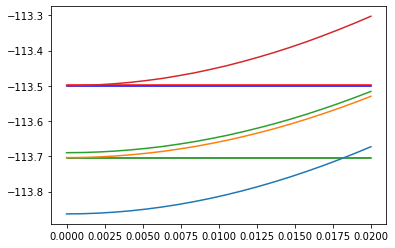

In [20]:
from matplotlib import pyplot as plt
plt.plot(Ex, cis_array[0,:], 'green' )
plt.plot(Ex, cis_array[1,:], 'blue' )
plt.plot(Ex, cis_array[2,:], 'red' )
plt.plot(Ex, cqed_cis_array[1,:])
plt.plot(Ex, cqed_cis_array[2,:])
plt.plot(Ex, cqed_cis_array[3,:])
plt.plot(Ex, cqed_cis_array[4,:])

In [19]:
#f.close()

In [4]:
ndocc = wfn.nalpha()
nmo = wfn.nmo()
nvirt = nmo-ndocc

print(ndocc)
print(nvirt)
MO = cqed_dict['cqed_rhf_transformation_vectors'] 
MO_occ = MO[:,:ndocc]
MO_virt = MO[:, ndocc:]

CVEC = cqed_dict['cqed_cis eigenvectors']

nto_dict = get_nto(CVEC, MO_occ, MO_virt)
a = np.sum(nto_dict['weights LP0'])
b = np.sum(nto_dict['weights LP1'])
c = np.sum(nto_dict['weights UP0'])
d = np.sum(nto_dict['weights UP1'])
print(a+b+c+d)

print(nto_dict['weights LP0'])
print(nto_dict['weights LP1'])
print(nto_dict['weights UP0'])
print(nto_dict['weights UP1'])

8
4
1.0000723019948037
[9.99414791e-01 1.32494939e-06 5.77184657e-32 4.96132406e-34]
[5.83873678e-04 1.07430273e-08 4.80395718e-33 2.71081583e-35]
[5.97404250e-05 9.16978488e-06 3.17219099e-06 2.18157791e-07]
[1.26462254e-09 8.72866364e-11 7.62703332e-11 7.97794906e-12]


In [5]:
# get dictionary form of wavefunction
wfn_dict = psi4.core.Wavefunction.to_file(wfn)
#### uncomment Get orbitals from CQED
wfn_dict['matrix']['Ca'] = nto_dict['NTO UP1']
wfn_dict['matrix']['Cb'] = nto_dict['NTO UP1']
# update wfn object
wfn_cqed_cis = psi4.core.Wavefunction.from_file(wfn_dict) 


In [7]:
psi4.set_options({
    'CUBEPROP_TASKS': ['ORBITALS'],
    'CUBEPROP_ORBITALS': [7,8,9,10],
})
cube = psi4.cubeprop(wfn_cqed_cis)

fortecubeview.plot()

CubeViewer: listing cube files from the directory .
Reading 4 cube files


HTML(value='\n        <style>\n           .jupyter-widgets-output-area .output_scroll {\n                heigh…

interactive(children=(Select(description='Cube files:', options=('MO    7a (7-A)', 'MO    8a (8-A)', 'MO    9a…

In [ ]:
psi4.set_options({
    'CUBEPROP_TASKS': ['ORBITALS'],
    'CUBEPROP_ORBITALS': [5,6,7,8],
})
cube = psi4.cubeprop(wfn_cqed_cis)
mol.save_xyz_file("mgh.xyz", 1)
f = open("mgh.xyz")
xyz = f.read()
f.close()


In [ ]:
fnto = open("Psi_a_6_6-A.cube")
datanto = fnto.read()
fnto.close()
v = py3Dmol.view()
v.addVolumetricData(datanto, "cube", {'isoval': -0.075, 'color': "red", 'opacity': 0.80})
v.addVolumetricData(datanto, "cube", {'isoval': 0.075, 'color': "blue", 'opacity': 0.80})
v.addModel(xyz, 'mol')
v.setStyle({'stick':{}})
v.zoomTo()
v.show()